In [74]:
import requests as req
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [75]:
# read places 
xls = pd.ExcelFile('Project1_AmazonSites.xlsx') 
places_df=xls.parse('AmazonCities', dtype=str) 
# read sites 
xls = pd.ExcelFile('Project1_AmazonSites.xlsx') 
sites_df=xls.parse('AmazonSites', dtype=str) 

## Housing Data

data from Census API

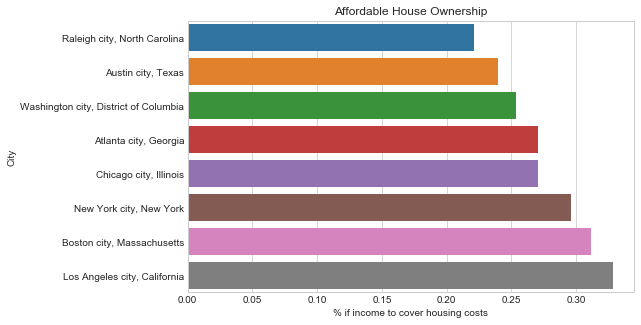

In [76]:
# Housing data from Census
housing_df = pd.read_csv("housing.csv")

plt.figure(figsize=(8,5))
housing_df = housing_df.sort_values('home owner afford')
sns.barplot(y='City',x='home owner afford',data=housing_df)
plt.xlabel("% if income to cover housing costs")

plt.title("Affordable House Ownership")
plt.savefig("affordhouse.png")
plt.show()


In [95]:
ranking_own = pd.DataFrame(housing_df['City'])
ranking_own=ranking_own.rename(columns={'City':'Housing Owner Affordability'})
ranking_own
ranking= ranking_own
ranking

,Housing Owner Affordability
5,"Raleigh city, North Carolina"
6,"Austin city, Texas"
0,"Washington city, District of Columbia"
3,"Chicago city, Illinois"
7,"Atlanta city, Georgia"
2,"Boston city, Massachusetts"
1,"New York city, New York"
4,"Los Angeles city, California"


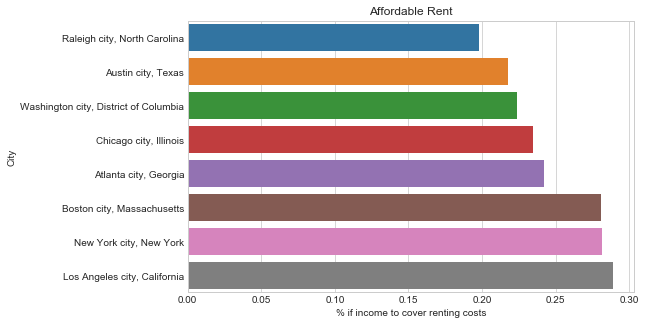

In [96]:
plt.figure(figsize=(8,5))
housing_df = housing_df.sort_values('rent afford')
sns.barplot(y='City',x='rent afford',data=housing_df)
plt.xlabel("% if income to cover renting costs")
plt.title("Affordable Rent")
plt.savefig("affordrent.png")
plt.show()

In [94]:
ranking_rent = pd.DataFrame(housing_df['City'])
ranking_rent=ranking_rent.rename(columns={'City':'Rent Affordability'})
ranking_rent
ranking['rent']=r['Rent Affordability']

ranking

,Housing Owner Affordability,k-12 schools,rent
5,"Raleigh city, North Carolina",New York,"Boston city, Massachusetts"
6,"Austin city, Texas",Northern Virginia Area,"New York city, New York"
0,"Washington city, District of Columbia",Atlanta,"Raleigh city, North Carolina"
3,"Chicago city, Illinois",Chicago,"Chicago city, Illinois"
7,"Atlanta city, Georgia",Raleigh,"Los Angeles city, California"
2,"Boston city, Massachusetts",Boston,"Washington city, District of Columbia"
1,"New York city, New York",Austin,"Austin city, Texas"
4,"Los Angeles city, California",Los Angeles,"Atlanta city, Georgia"


## Schools

In [89]:
# read data from Great Schools!
school_sites= pd.read_csv("schools_GreatSchool.csv")

In [90]:
#reduce to cities
cities = sites_df[['Amazon City', 'Site Name']]
cities = cities.merge(school_sites)


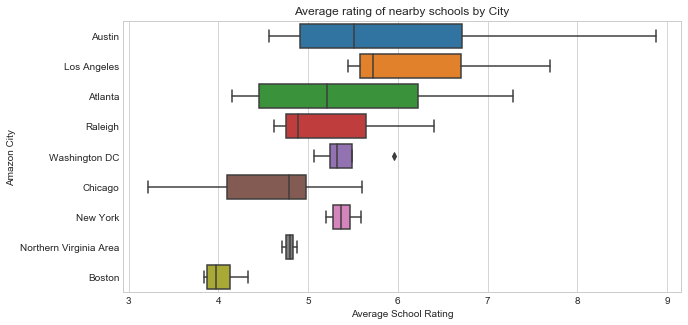

In [91]:
cities = cities.sort_values('Average School Rating', ascending=False)
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.boxplot(x='Average School Rating',y='Amazon City',data=cities)
plt.title("Average rating of nearby schools by City")
plt.savefig("ratingsschoolscity.png")
plt.show()

In [92]:
ranking_schools=cities.groupby(['Amazon City'])['Average School Rating'].mean()
ranking_schools=ranking_schools.reset_index()
ranking_schools = ranking_schools.sort_values('Average School Rating', ascending=False)
ranking_schools = ranking_schools.rename(columns={'Amazon City':'Schools Ranking'})
ranking_schools.reset_index()


,index,Schools Ranking,Average School Rating
0,4,Los Angeles,6.286171
1,1,Austin,6.029233
2,0,Atlanta,5.463783
3,8,Washington DC,5.414209
4,5,New York,5.379339
5,7,Raleigh,5.303704
6,6,Northern Virginia Area,4.794643
7,3,Chicago,4.551157
8,2,Boston,4.030282


In [86]:
ranking['k-12 schools']=ranking_schools['Schools Ranking']

In [87]:
ranking_scholo

,Housing Owner Affordability,k-12 schools
5,"Raleigh city, North Carolina",New York
6,"Austin city, Texas",Northern Virginia Area
0,"Washington city, District of Columbia",Atlanta
3,"Chicago city, Illinois",Chicago
7,"Atlanta city, Georgia",Raleigh
2,"Boston city, Massachusetts",Boston
1,"New York city, New York",Austin
4,"Los Angeles city, California",Los Angeles


## Colleges

In [73]:
schools_df = pd.read_csv("Colleges.csv")

schools_df['Rating'] = schools_df['Rating'].astype(float)
m = schools_df.groupby('Site Name')['Rating'].mean()
am = pd.DataFrame(m)
am = am.reset_index()
am = am.sort_values('Rating', ascending=False)
plt.figure(figsize=(5,10))
# sns.barplot(x='Rating',y='Site Name',data=am)
# plt.title("Average rating of nearby colleges")
# plt.savefig("nearbycollegerating.png")
# plt.show()

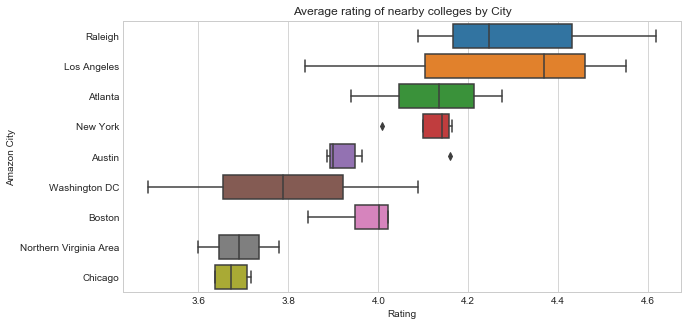

In [68]:
#reduce to cities
cities = sites_df[['Amazon City', 'Site Name']]
cities = cities.merge(am)
cities = cities.sort_values('Rating', ascending=False)
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.boxplot(x='Rating',y='Amazon City',data=cities)
plt.title("Average rating of nearby colleges by City")
plt.savefig("collegeratingscity.png")
plt.show()

In [69]:
ranking_college=cities.groupby('Amazon City').mean()
ranking_college = ranking_college.reset_index()
ranking_college = ranking_college.sort_values('Rating', ascending=False)
ranking_college = ranking_college.rename(columns={'Amazon City':'College Ranking'})
ranking_college
ranking['college']=ranking_college['College Ranking']

In [72]:
ranking.to_csv("house_school.csv")